In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customers.csv")

In [3]:
df

,customer_id,total_spend,num_orders,last_order_date
0,1001,8072.510788,14,2023-05-28
1,1002,4295.331083,39,2023-09-06
2,1003,9527.625896,10,2023-05-10
3,1004,4760.739090,46,2023-03-06
4,1005,6070.383831,45,2023-06-24
...,...,...,...,...
995,1996,5208.117050,4,2023-10-06
996,1997,9912.171374,30,2023-01-20
997,1998,7101.159629,8,2023-11-01
998,1999,7886.051337,46,2023-07-02


In [4]:
X = df[['total_spend','num_orders']]

In [5]:
km = KMeans(n_clusters=3, random_state=42)

In [6]:
y_pred = km.fit_predict(X)

In [7]:
y_pred

array([1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1,
       0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0,
       2, 1, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1,
       0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0,
       0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2,

In [8]:
dfk = df.drop(['customer_id','last_order_date'],axis=1)

In [9]:
dfk

,total_spend,num_orders
0,8072.510788,14
1,4295.331083,39
2,9527.625896,10
3,4760.739090,46
4,6070.383831,45
...,...,...
995,5208.117050,4
996,9912.171374,30
997,7101.159629,8
998,7886.051337,46


In [10]:
dfk['cluster']=y_pred

In [11]:
dfk

,total_spend,num_orders,cluster
0,8072.510788,14,1
1,4295.331083,39,2
2,9527.625896,10,1
3,4760.739090,46,2
4,6070.383831,45,2
...,...,...,...
995,5208.117050,4,2
996,9912.171374,30,1
997,7101.159629,8,1
998,7886.051337,46,1


In [12]:
df1=dfk[dfk.cluster==0]
df2=dfk[dfk.cluster==1]
df3=dfk[dfk.cluster==2]

In [13]:
km.cluster_centers_

array([[1840.13368858,   25.78915663],
       [8349.83632257,   26.02786378],
       [5230.82597141,   25.71014493]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


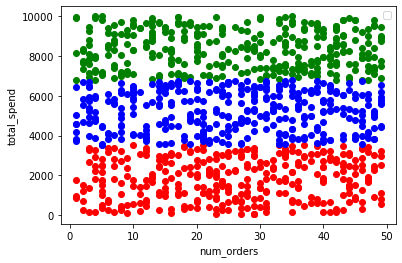

In [14]:
plt.scatter(df1.num_orders,df1['total_spend'],color='red')
plt.scatter(df2.num_orders,df2['total_spend'],color='green')
plt.scatter(df3.num_orders,df3['total_spend'],color='blue')

plt.xlabel('num_orders')
plt.ylabel('total_spend')
plt.legend()

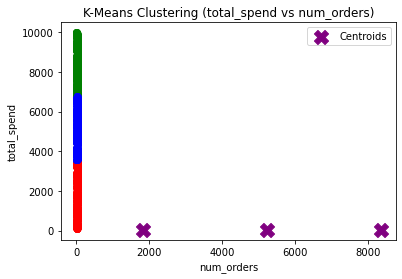

In [15]:
plt.scatter(df1.num_orders,df1['total_spend'],color='red')
plt.scatter(df2.num_orders,df2['total_spend'],color='green')
plt.scatter(df3.num_orders,df3['total_spend'],color='blue')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='X', s=200, label='Centroids')

plt.xlabel('num_orders')
plt.ylabel('total_spend')
plt.legend()

plt.title('K-Means Clustering (total_spend vs num_orders)')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
dfk.drop(['cluster'],inplace=True, axis=1)

In [18]:
scaler = StandardScaler()


numeric_columns = dfk.select_dtypes(include=['float64', 'int64']).columns


In [19]:
dfk[numeric_columns] = scaler.fit_transform(dfk[numeric_columns])


In [20]:
dfk

,total_spend,num_orders
0,1.051607,-0.852616
1,-0.290342,0.947823
2,1.568577,-1.140686
3,-0.124993,1.451946
4,0.340295,1.379929
...,...,...
995,0.033951,-1.572792
996,1.705198,0.299665
997,0.706507,-1.284722
998,0.985362,1.451946


In [21]:
km=KMeans(n_clusters=5, random_state=42)
y_pred = km.fit_predict(X)
dfk['cluster'] = y_pred

In [22]:
dfk

,total_spend,num_orders,cluster
0,1.051607,-0.852616,2
1,-0.290342,0.947823,0
2,1.568577,-1.140686,2
3,-0.124993,1.451946,0
4,0.340295,1.379929,4
...,...,...,...
995,0.033951,-1.572792,0
996,1.705198,0.299665,2
997,0.706507,-1.284722,4
998,0.985362,1.451946,4


In [23]:
df1=dfk[dfk.cluster==0]
df2=dfk[dfk.cluster==1]
df3=dfk[dfk.cluster==2]
df4=dfk[dfk.cluster==3]
df5=dfk[dfk.cluster==4]


In [24]:
km.cluster_centers_

array([[5152.70646384,   26.02272727],
       [1065.30617203,   24.75132275],
       [9013.37191669,   25.39378238],
       [3200.45294536,   26.71759259],
       [6962.20644544,   26.1460177 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


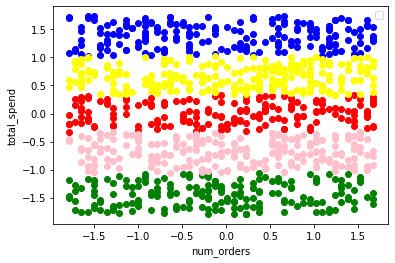

In [26]:
plt.scatter(df1.num_orders,df1['total_spend'],color='red')
plt.scatter(df2.num_orders,df2['total_spend'],color='green')
plt.scatter(df3.num_orders,df3['total_spend'],color='blue')
plt.scatter(df4.num_orders,df4['total_spend'],color='pink')
plt.scatter(df5.num_orders,df5['total_spend'],color='yellow')

plt.xlabel('num_orders')
plt.ylabel('total_spend')
plt.legend()

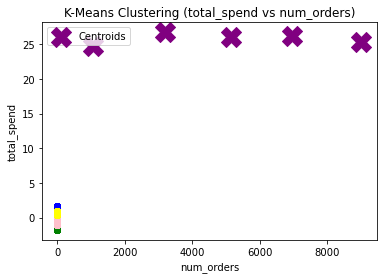

In [28]:
plt.scatter(df1.num_orders,df1['total_spend'],color='red')
plt.scatter(df2.num_orders,df2['total_spend'],color='green')
plt.scatter(df3.num_orders,df3['total_spend'],color='blue')
plt.scatter(df4.num_orders,df4['total_spend'],color='pink')
plt.scatter(df5.num_orders,df5['total_spend'],color='yellow')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='X', s=400, label='Centroids')

plt.xlabel('num_orders')
plt.ylabel('total_spend')
plt.legend()

plt.title('K-Means Clustering (total_spend vs num_orders)')
plt.show()

In [29]:
dfk.to_csv('kmeans_data.csv')